In [ ]:
#The program in this module is designed to calculate descriptors.
from mordred import Calculator, descriptors
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
if __name__ == '__main__':
   data = pd.read_excel('MP-smiles.xlsx', header=0)
   smiles = data.iloc[:, 0].tolist()
   mol_list = [Chem.MolFromSmiles(smi) for smi in smiles]
   calc = Calculator(descriptors, ignore_3D = True)
   descriptors_df = calc.pandas(mol_list)
   print(descriptors_df)
   descriptors_df.to_csv('MP-454-FEATURE.csv', index=False)


In [ ]:
# Delete columns containing strings

df = pd.read_csv('MP-454-FEATURE.csv')

# List to store columns containing strings
string_columns = []

# Iterate through the columns to find columns with string values
for column in df.columns:
    if df[column].dtype == object:
        # Check from the second row onward for any string that contains alphabetic characters
        if df.iloc[1:, df.columns.get_loc(column)].str.contains('[A-Za-z]').any():  
            string_columns.append(column)

# Drop the identified string columns
df = df.drop(string_columns, axis=1)

# Save the result to a new Excel file
df.to_excel('MP-454-FEATURE.xlsx', index=False)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   27.7s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  2.0min
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 1167 out of 1167 | elapsed:  3.6min finished

[2024-05-26 11:45:55] Features: 1/20 -- score: 0.2867621059607325[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   35.6s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:  1.4min
[Parallel(n_jobs=8)]: Done 632 tasks      | elapsed:  2.5min
[Parallel(n_jobs=8)]: Done 997 tasks      | elapsed:  3.7min
[Parallel(n_jobs=8)]: Done 1166 out of 1166 | elapsed:  4.2min finished

[2024-05-26 11:50:09] Feature

选中的特征：
Index(['nHetero', 'ATS1dv', 'ATS0s', 'AATS3Z', 'ATSC1are', 'ATSC8i',
       'AATSC1pe', 'MATS2s', 'MATS1v', 'MATS1p', 'MATS1i', 'GATS1p',
       'BCUTdv-1l', 'Xc-4d', 'Mse', 'NaaCH', 'IC3', 'SlogP_VSA4',
       'EState_VSA4', 'VSA_EState1'],
      dtype='object')


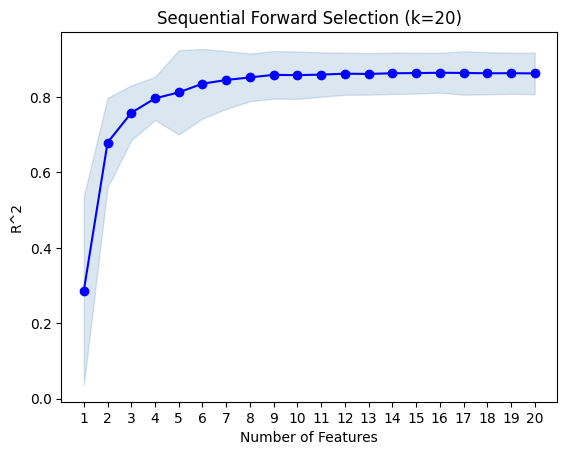

In [1]:
##################SFS############################
# Import necessary libraries
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import warnings

# Ignore FutureWarning type warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Generate sample data
dataset = pd.read_excel('MP-454-FEATURE.xlsx')
dataset = dataset.replace(np.nan, 0)
X = dataset.iloc[:, 8:2172]
Y = dataset.iloc[:, 5]

# Set the number of parallel jobs
n_jobs = 8

# Use forward feature selection
sfs1 = SFS(RandomForestRegressor(random_state=42),
           k_features=20,
           forward=True,
           floating=False,
           verbose=2,
           scoring='r2',
           cv=5,
           n_jobs=n_jobs)

try:
    # Perform feature selection
    sfs1 = sfs1.fit(np.array(X), Y)
except ValueError as e:
    print(f"Error: {e}")
    print("There may not be enough features or the model may fail to converge.")

# Get the indices of the selected features
selected_feature_idx = sfs1.k_feature_idx_
selected_features = X.columns[list(selected_feature_idx)]
print(f"Selected features:\n{selected_features}")

# Plot the sequential feature selection results
fig = plot_sequential_feature_selection(sfs1.get_metric_dict())
plt.ylabel('R^2')
plt.xlabel('Number of Features')
plt.title('Sequential Forward Selection (k=20)')
plt.show()



In [2]:
# Create a new DataFrame containing only the selected features
selected_data = dataset[selected_features]

# Save the selected features to an Excel file
selected_data.to_excel('MP-454-select-FEATURE.xlsx', index=False)
